Cadnidate number: AG39349

Exercise 1:

Exploration of the dataset and visualisation of distributions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency


df = pd.read_csv("TimeSeries.csv")

df.head()

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C
0,181199,0,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,NaN,105.0,NaN,NaN
1,181199,0,102.0,73.0,90.0,17.0,NaN,NaN,NaN,114.0,NaN,127.0,100.0,36.599998
2,181199,0,78.0,57.0,130.0,9.0,NaN,NaN,169.0,116.0,NaN,NaN,100.0,36.599998
3,181199,0,88.0,62.0,107.0,11.0,NaN,NaN,138.0,115.0,NaN,NaN,100.0,36.500000
4,181199,0,116.0,82.0,132.0,11.0,NaN,NaN,NaN,120.0,NaN,NaN,100.0,36.500000


In [3]:
df.describe()



,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C
count,29448.000000,29448.00000,17836.000000,17884.000000,17884.000000,13939.000000,1047.000000,512.000000,4142.000000,20114.000000,1746.000000,1599.000000,19323.000000,12908.000000
mean,150729.435208,0.04401,77.389549,57.381626,118.825263,11.386311,1.453486,91.741797,125.361661,86.259471,10.403110,143.520951,97.071236,37.239037
std,29351.498391,0.20512,14.705526,11.362053,21.895607,5.191388,1.319426,22.899203,39.294528,14.466417,1.481641,65.167057,3.134375,1.859348
min,100059.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,26.000000,33.000000,4.500000,26.000000,0.500000,0.000000
25%,125858.000000,0.00000,68.000000,50.000000,104.000000,8.000000,0.800000,76.750002,101.000000,77.000000,9.400000,99.500000,96.000000,37.000000
50%,151246.000000,0.00000,75.000000,56.000000,116.000000,11.000000,1.100000,88.800003,120.000000,86.000000,10.300000,131.000000,97.000000,37.400002
75%,175905.000000,0.00000,84.000000,64.000000,131.000000,14.000000,1.500000,104.500000,142.000000,95.000000,11.200000,174.000000,99.000000,37.799999
max,199998.000000,1.00000,287.000000,155.000000,227.000000,48.000000,12.500000,208.199997,600.000000,208.000000,17.100000,689.000000,100.000000,39.700001


In [4]:
df.shape

(29448, 14)

unique patients: 1126

outcome split:
survived (0): 1077
died (1): 49
total: 1126


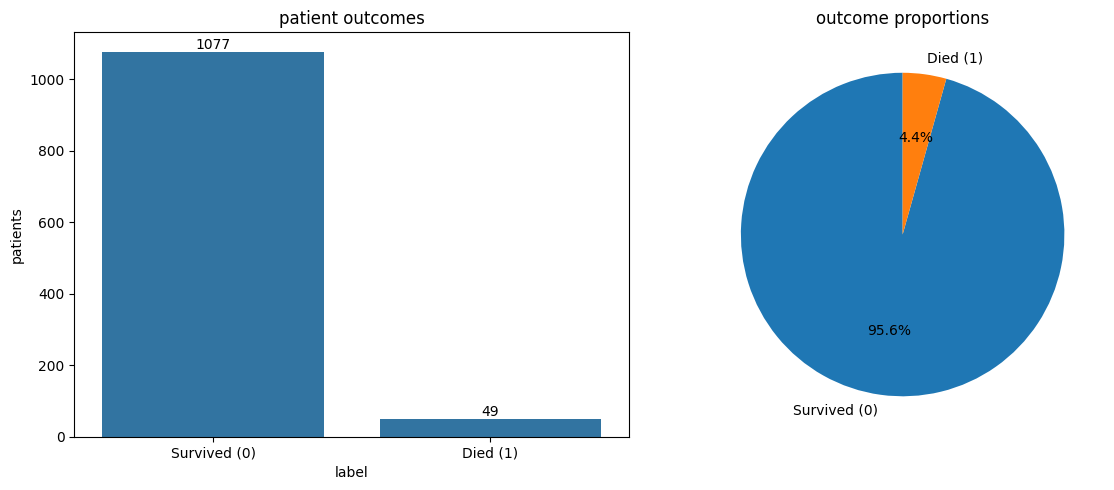

In [5]:
num_patients = df['PatientID'].nunique()
print('unique patients:', num_patients)

# Filter for patient id and mortality 
outcomes = df.groupby('PatientID')['Mortality'].first()
counts = outcomes.value_counts().sort_index()

print('\noutcome split:')
print('survived (0):', counts[0])
print('died (1):', counts[1])
print('total:', counts.sum())


plot_df = counts.reset_index()
plot_df.columns = ['Mortality', 'count']
plot_df['label'] = plot_df['Mortality'].map({0: 'Survived (0)', 1: 'Died (1)'})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# plot a bar graph of the outcome split
sns.barplot(data=plot_df, x='label', y='count', ax=ax1)
ax1.set_ylabel('patients')
ax1.set_title('patient outcomes')


for i, v in enumerate(plot_df['count']):
    ax1.text(i, v, v, ha='center', va='bottom')

# plot a pie chart to visualis percentual representation
ax2.pie(
    plot_df['count'],
    labels=plot_df['label'],
    autopct='%1.1f%%',
    startangle=90
)
ax2.set_title('outcome proportions')

plt.tight_layout()
plt.show()


There are 1,126 patients recorded in the dataset. The outcome class (‘Mortality’ where 1 represents ‘Did not survive’ and 0 represents ‘Survived’) is highly unbalanced as there are 1077 patients who survived and 49 who did not.

num numeric vars: 12
vars: ['MeanBP', 'DiasBP', 'SysBP', 'Centralvenouspressure ', 'Creatinine', 'DailyWeight', 'Glucose', 'HeartRate', 'Haemoglobin', 'Platelets', 'SpO2', 'Temperature C']


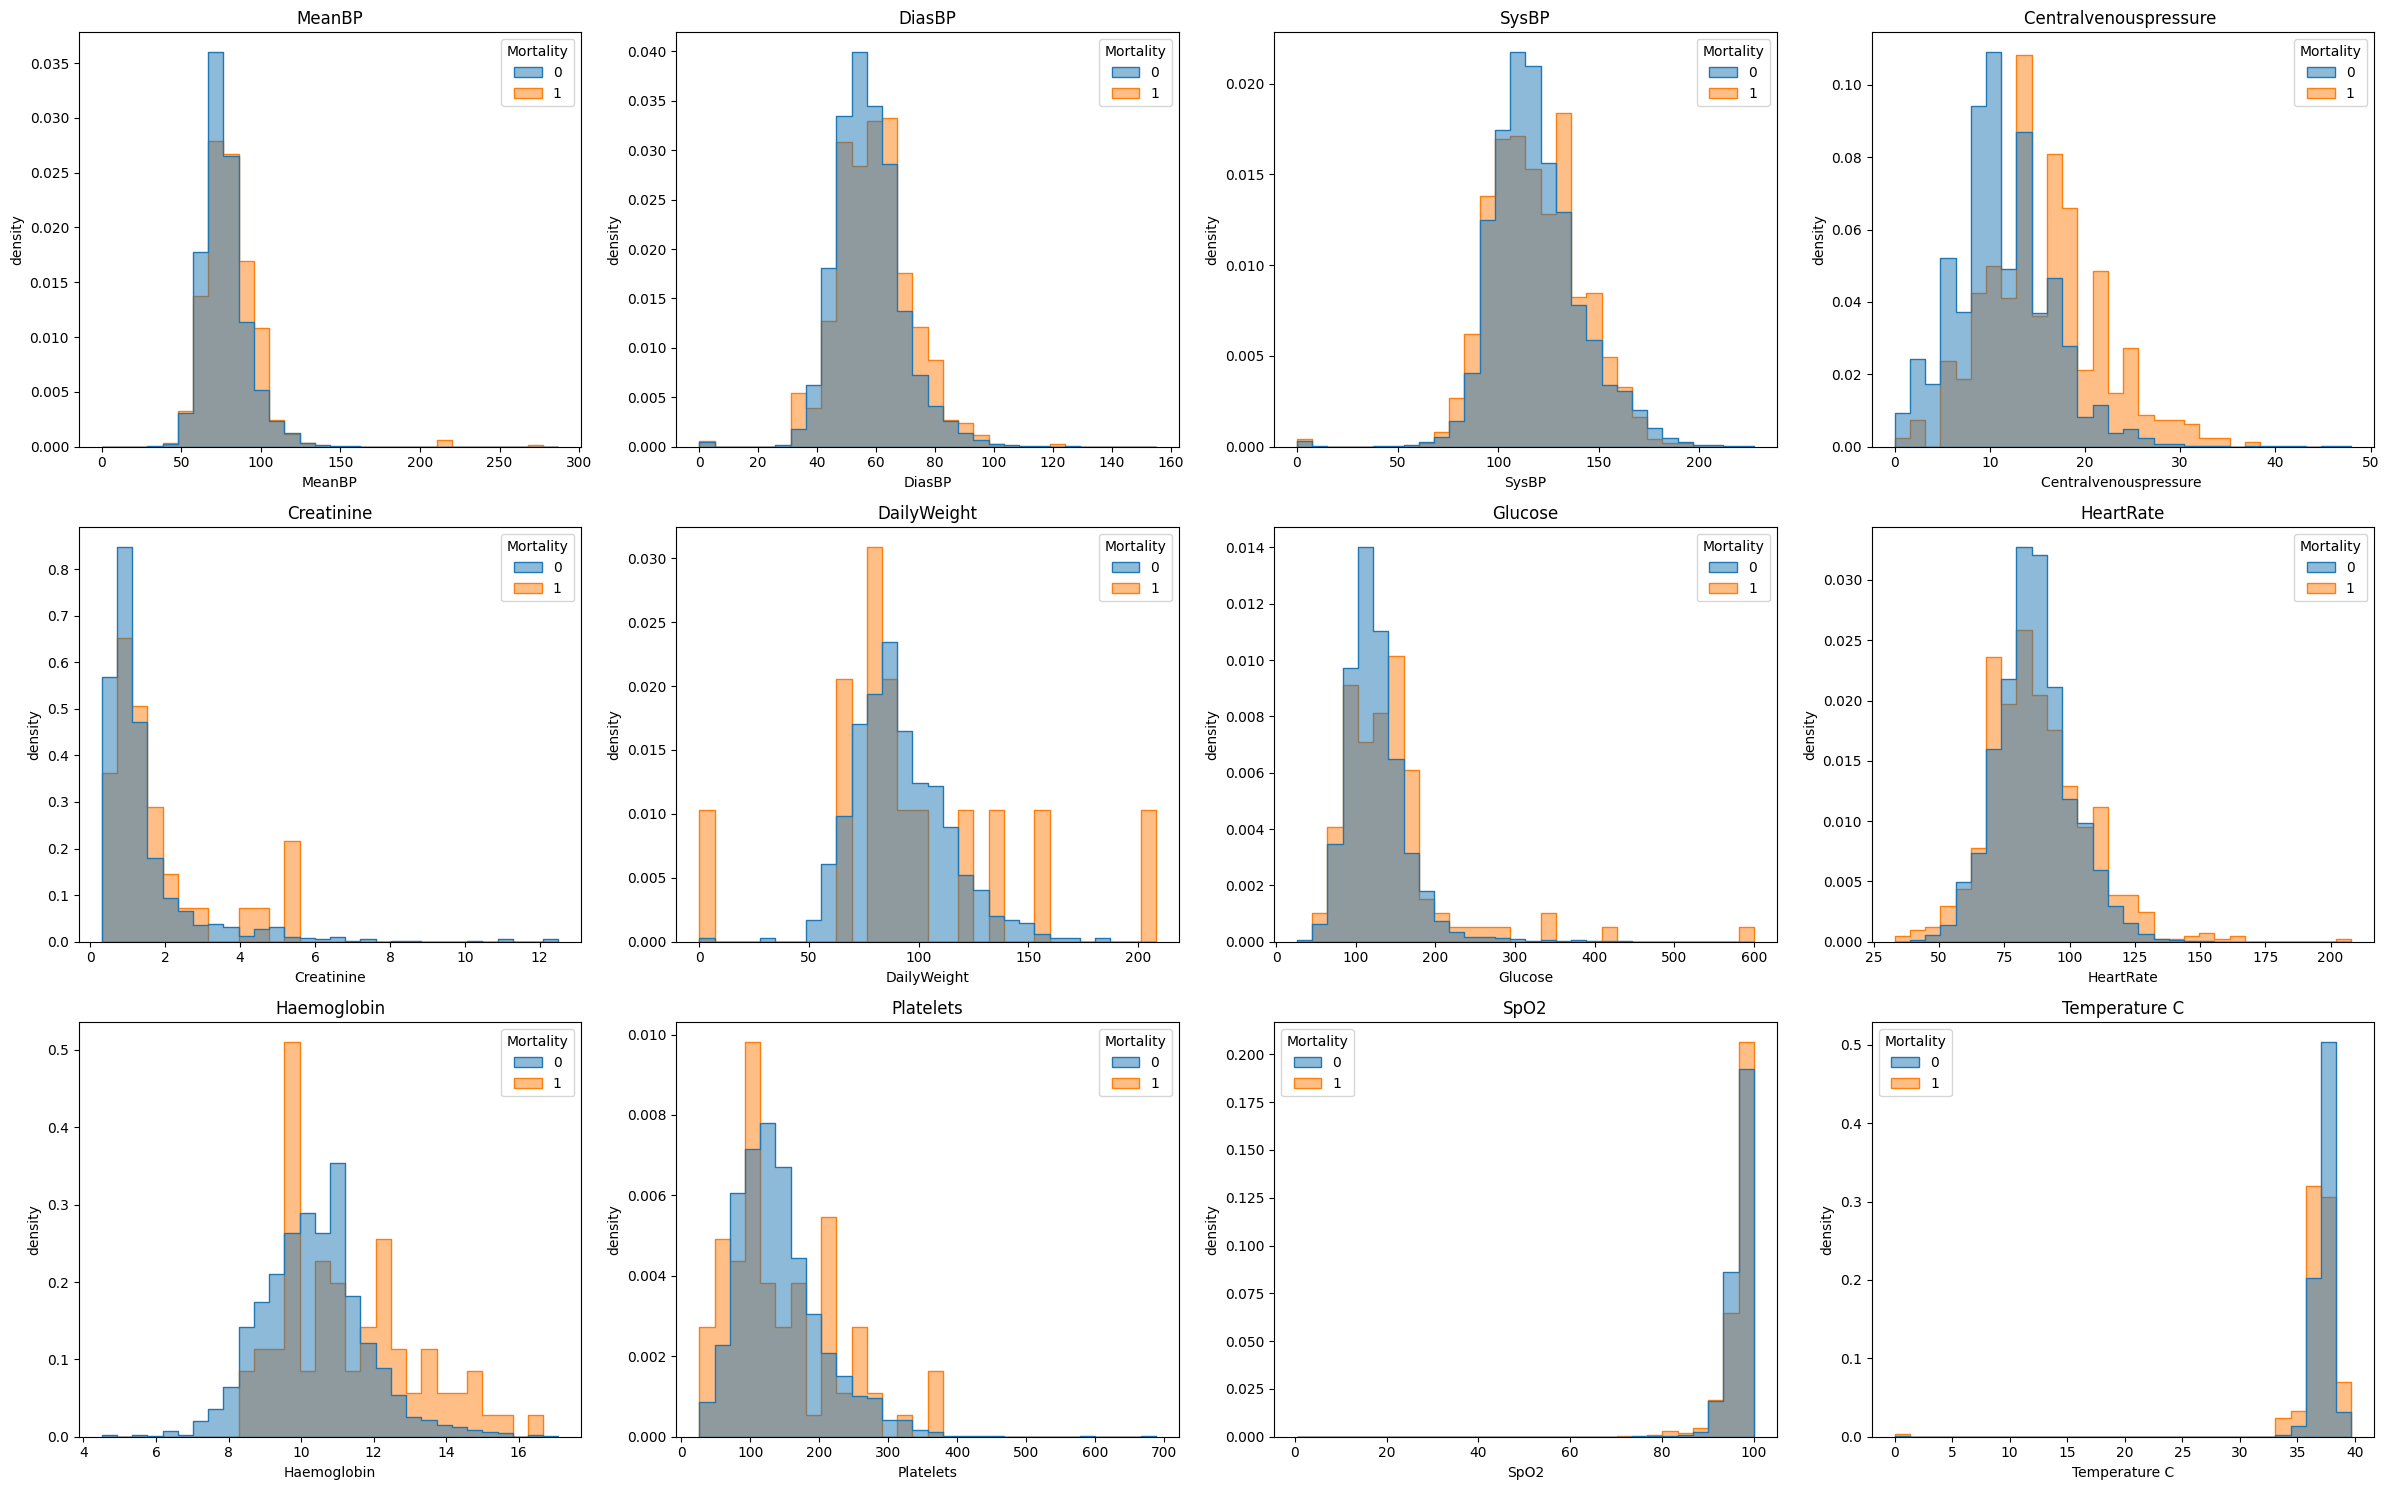

In [6]:

# select all numeric columns
titles = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
titles = [c for c in titles if c not in ['PatientID', 'Mortality']]

print('num numeric vars:', len(titles))
print('vars:', titles)

ncols = 4
nrows = (len(titles) + ncols - 1) // ncols
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 5*nrows))
ax = ax.flatten() if len(titles) > 1 else [ax]

# loop for all variables in the dataset
# plot a histogram to show distribution
for i, col in enumerate(titles):
    sns.histplot(
        data=df, x=col, hue='Mortality', # differ for mortality outcome classes
        bins=30, stat='density', common_norm=False,
        element='step', alpha=0.5,
        ax=ax[i]
    )
    ax[i].set_title(col)
    ax[i].set_ylabel('density')

# turn off any extra subplots - taken from offical matplotlib documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_axis_off.html)
for j in range(len(titles), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

num numeric vars: 12
vars: ['MeanBP', 'DiasBP', 'SysBP', 'Centralvenouspressure ', 'Creatinine', 'DailyWeight', 'Glucose', 'HeartRate', 'Haemoglobin', 'Platelets', 'SpO2', 'Temperature C']


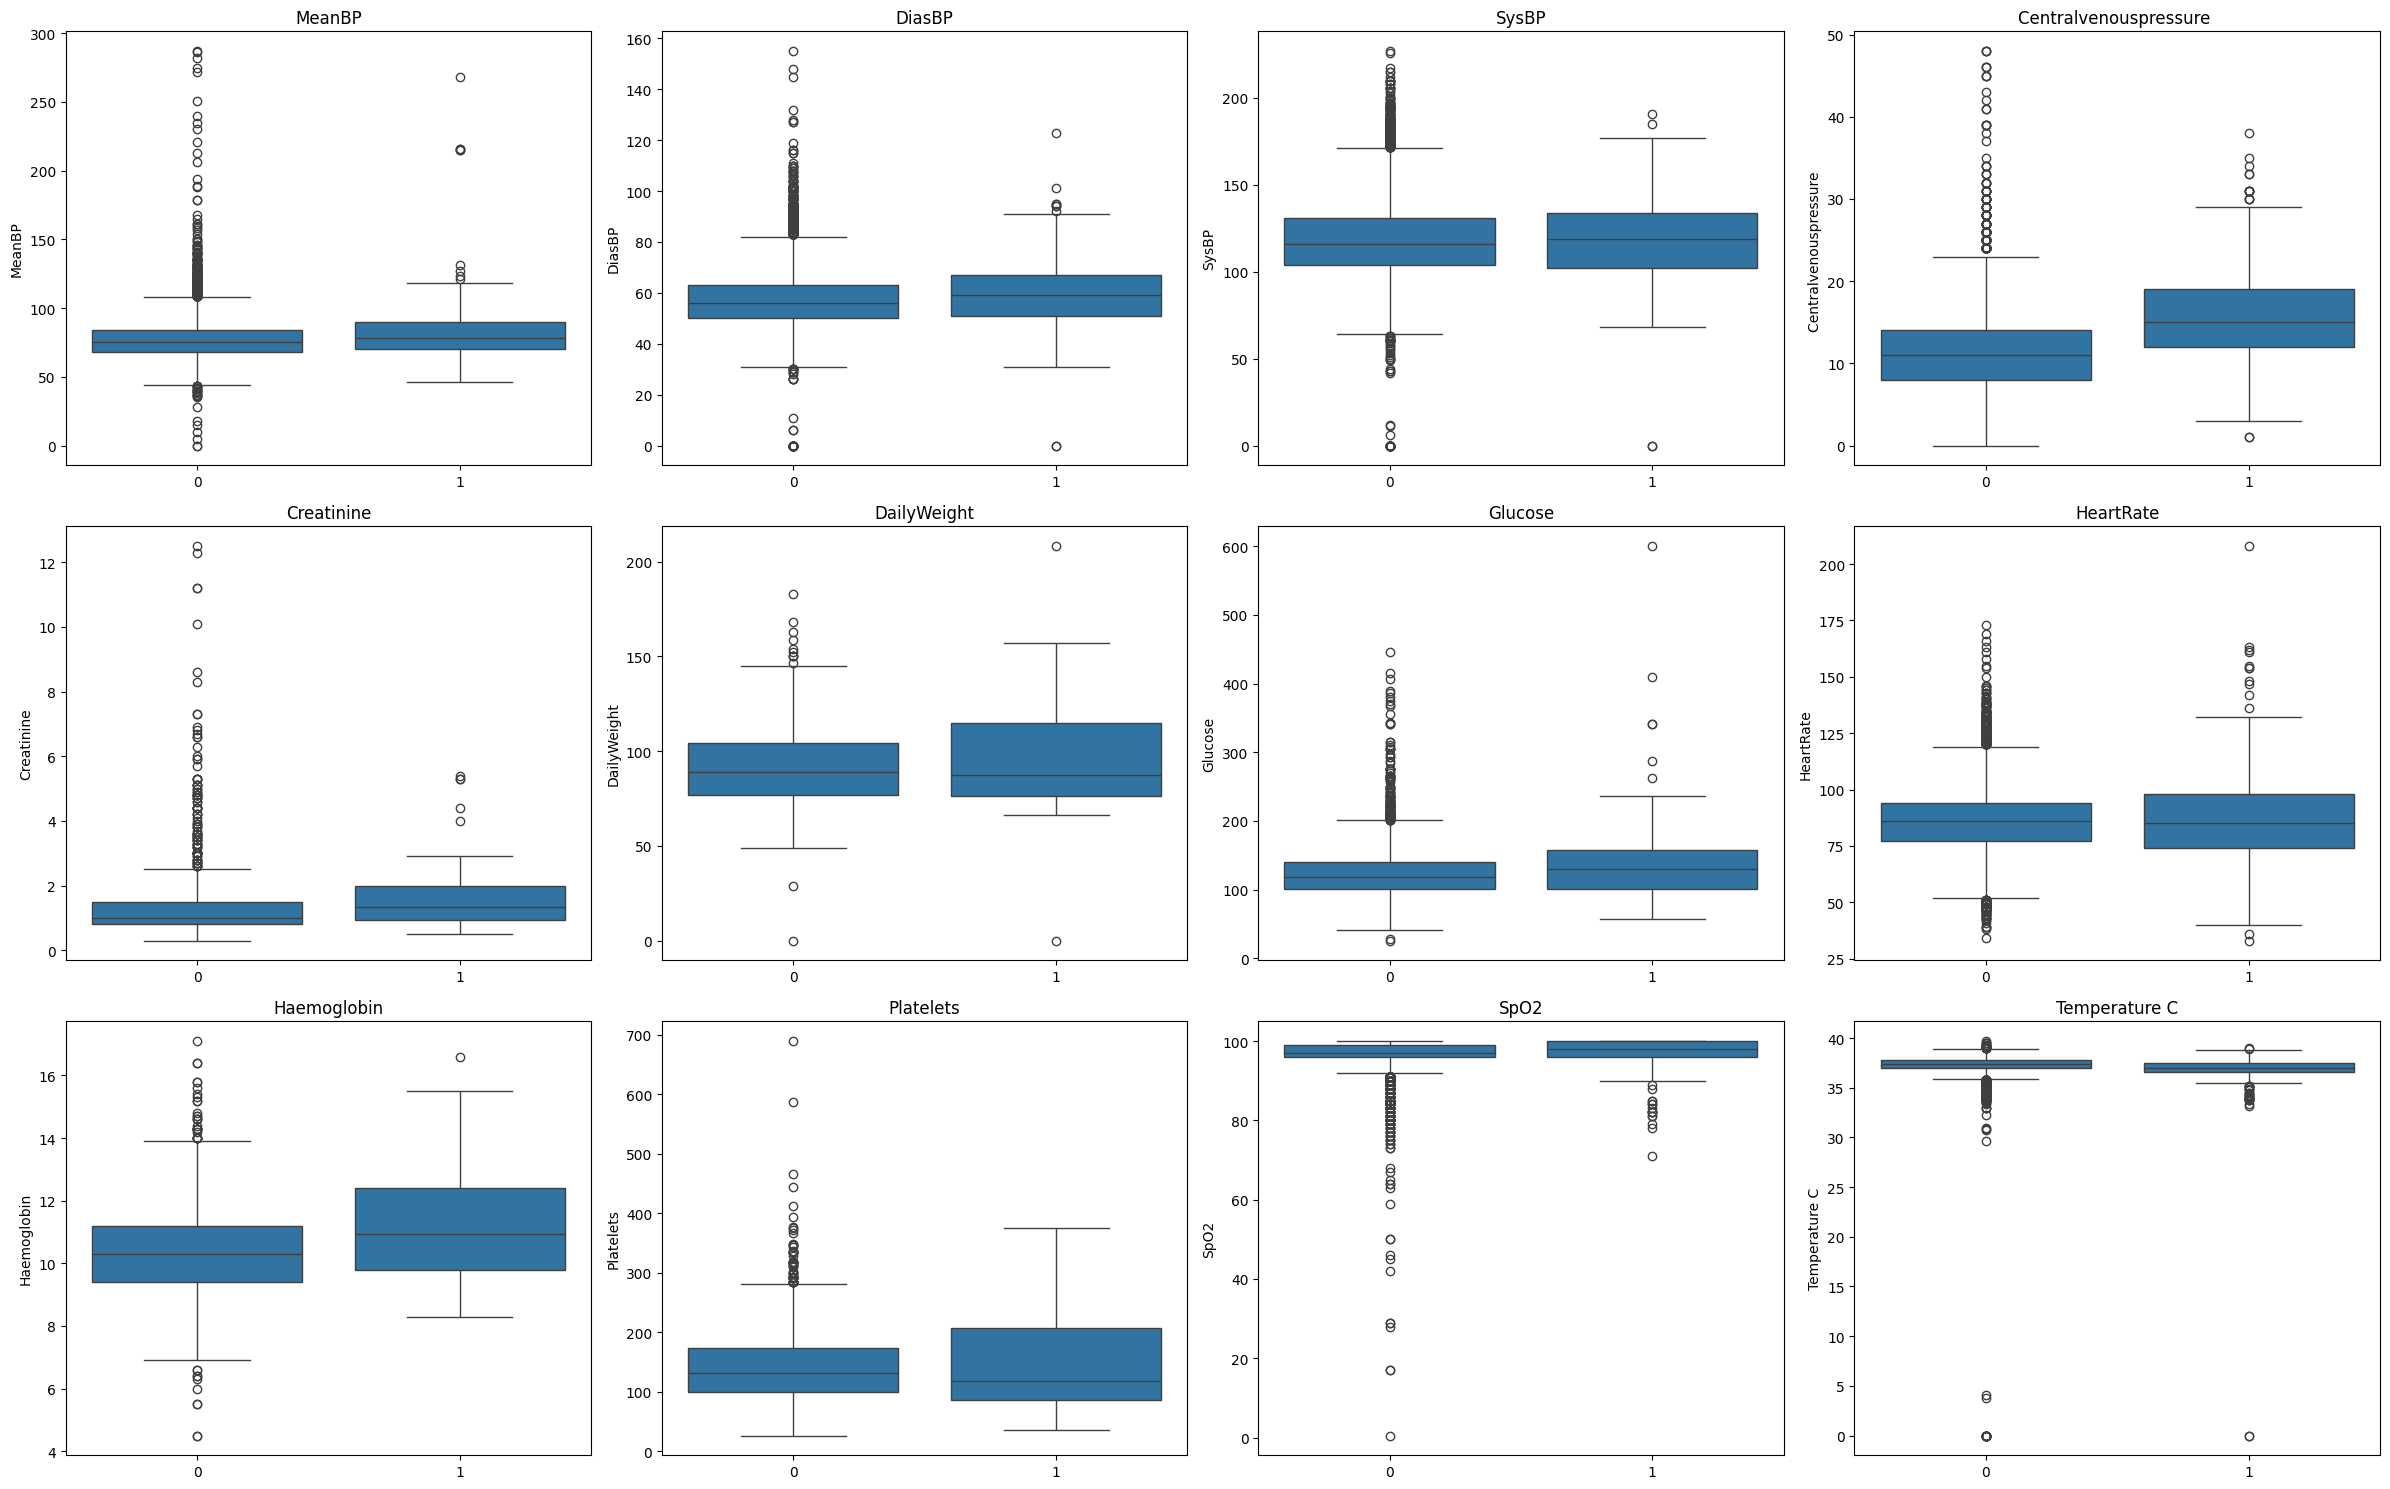

In [7]:
# repeat process from the cell above
# generate box plots instead of histigrams

titles = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
titles = [c for c in titles if c not in ['PatientID', 'Mortality']]

print('num numeric vars:', len(titles))
print('vars:', titles)

ncols = 4
nrows = (len(titles) + ncols - 1) // ncols
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 5*nrows))
ax = ax.flatten() if len(titles) > 1 else [ax]

for i, col in enumerate(titles):
    sns.boxplot(
        data=df,
        x='Mortality',
        y=col,
        ax=ax[i]
    )
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(col)

for j in range(len(titles), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

The
 trends across the outcome classes seem moderately similar. The box plots suggest that variables such SpO2, Temperature or Glucose have similar median values and overlapping IQRs in both outcome classes. Some variables such as Weight or Haemoglobin display small shifts of their distribution between the two classes. However, there is a substantial overlap across outcome classes for most variables. 


In [11]:
# Question 3: Number of intervals per patient
intervals_per_patient = df.groupby('PatientID').size()
print(f'Number of intervals per patient statistics:')
print(intervals_per_patient.describe())

print(f'  Min intervals: {intervals_per_patient.min()}')
print(f'  Max intervals: {intervals_per_patient.max()}')
print(f'  Mean intervals: {intervals_per_patient.mean():.2f}')
print(f'  Median intervals: {intervals_per_patient.median():.2f}')





Number of intervals per patient statistics:
count    1126.000000
mean       26.152753
std         7.966024
min        24.000000
25%        24.000000
50%        24.000000
75%        24.000000
max       120.000000
dtype: float64
  Min intervals: 24
  Max intervals: 120
  Mean intervals: 26.15
  Median intervals: 24.00


The intervals are not same for all the patients. The minimal amount of measured intervals is 24 and the maximal is 120, so the number of intervals vary between different patients. The mean number of measured intervals is 26.15. 

Exercise 2:

Understanding missingness.

Data missingness summary statistics

Total cells in dataset: 412,272
  • Available (non-missing) data: 187,830 cells (45.56%)
  • Missing data: 224,442 cells (54.44%)

Total rows: 29,448
Total columns: 14
Variables with missing data: 12
Variables with complete data: 2


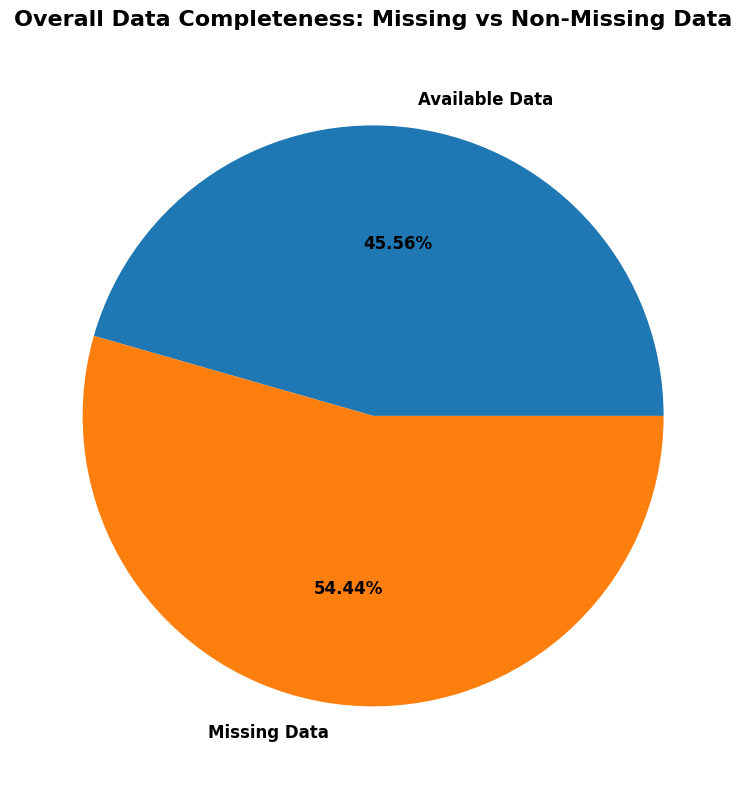

In [16]:
# Calculate missing data statistics
total_rows = len(df)
missing_stats = df.isnull().sum()
total_cells = total_rows * len(df.columns)
total_missing = missing_stats.sum()
total_available = total_cells - total_missing
overall_missing_pct = (total_missing / total_cells) * 100

# Summary statistics

print("Data missingness summary statistics")
print(f"\nTotal cells in dataset: {total_cells:,}")
print(f"  • Available (non-missing) data: {total_available:,} cells ({100 - overall_missing_pct:.2f}%)")
print(f"  • Missing data: {total_missing:,} cells ({overall_missing_pct:.2f}%)")
print(f"\nTotal rows: {total_rows:,}")
print(f"Total columns: {len(df.columns)}")
print(f"Variables with missing data: {(missing_stats > 0).sum()}")
print(f"Variables with complete data: {(missing_stats == 0).sum()}")

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))

# Data for pie chart
sizes = [total_available, total_missing]
labels = ['Available Data', 'Missing Data']


# Create pie chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.2f%%',
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

ax.set_title('Overall Data Completeness: Missing vs Non-Missing Data', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

In [ ]:
total_rows = len(df)
missing_stats = df.isnull().sum()
missing_percent = (missing_stats / total_rows) * 100

# create categories for the summary statistics
missing_summary = pd.DataFrame({
    'Variable': missing_stats.index,
    'Missing_Count': missing_stats.values,
    'Missing_Percentage': missing_percent.values,
    'Available_Count': (total_rows - missing_stats.values),
    'Available_Percentage': (100 - missing_percent.values)
})

# Sort by missing percentage
missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)

print("Overall missing data summary: ")
print(f"\nTotal number of rows in dataset: {total_rows:,}")
print(f"Total number of variables: {len(df.columns)}")
print(f"\nVariables with missing data: {(missing_stats > 0).sum()}")
print(f"Variables with complete data: {(missing_stats == 0).sum()}")


print("Missing data by variable (sorted by missing percentage): ")
print(missing_summary.to_string(index=False))


total_cells = total_rows * len(df.columns)
total_missing = missing_stats.sum()
overall_missing_pct = (total_missing / total_cells) * 100
print(f"\nOverall missing data: {total_missing:,} out of {total_cells:,} cells ({overall_missing_pct:.2f}%)")

Overall missing data summary: 

Total number of rows in dataset: 29,448
Total number of variables: 14

Variables with missing data: 12
Variables with complete data: 2
Missing data by variable (sorted by missing percentage): 
              Variable  Missing_Count  Missing_Percentage  Available_Count  Available_Percentage
           DailyWeight          28936           98.261342              512              1.738658
            Creatinine          28401           96.444580             1047              3.555420
             Platelets          27849           94.570090             1599              5.429910
           Haemoglobin          27702           94.070905             1746              5.929095
               Glucose          25306           85.934529             4142             14.065471
         Temperature C          16540           56.166802            12908             43.833198
Centralvenouspressure           15509           52.665716            13939             47.334284

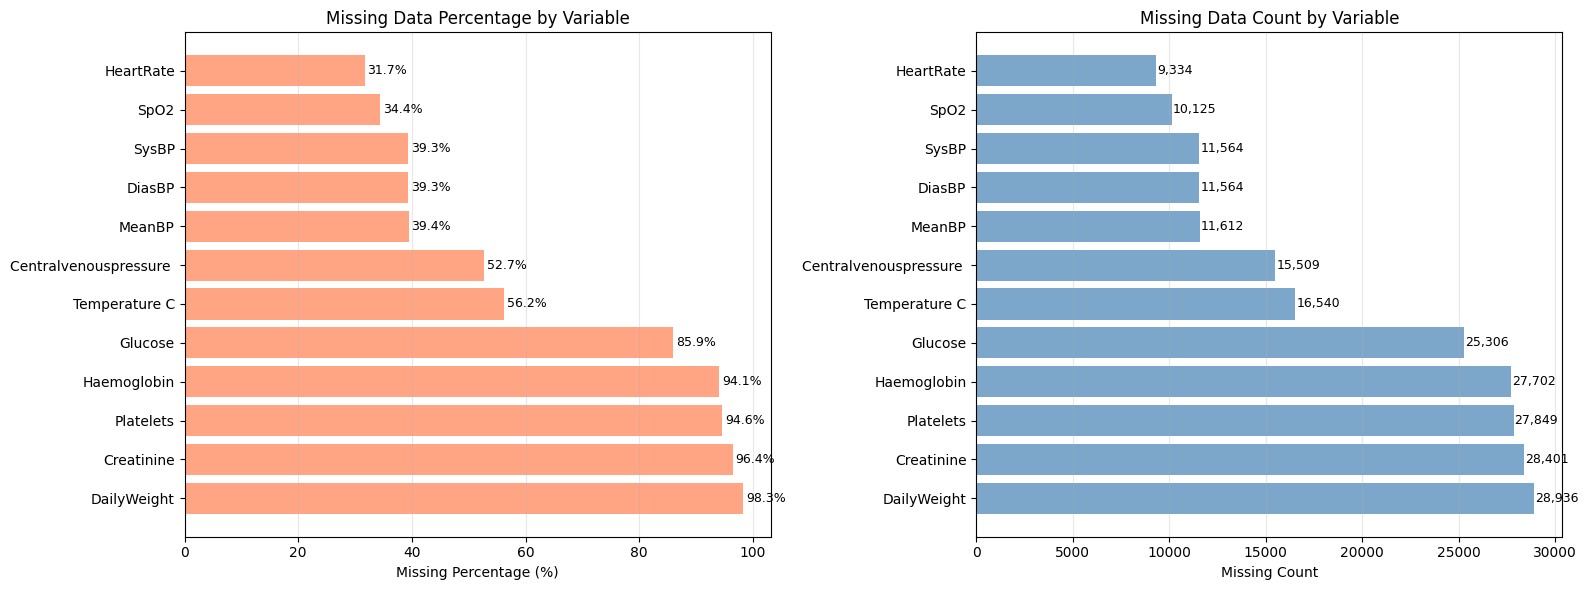

In [ ]:
# exclude PatientID and mortality from visualization 
vars_to_plot = [col for col in missing_summary['Variable'] if col not in ['PatientID', 'Mortality']]
missing_summary_vars = missing_summary[missing_summary['Variable'].isin(vars_to_plot)]

# create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of missing percentages
bars = ax1.barh(range(len(missing_summary_vars)), missing_summary_vars['Missing_Percentage'], 
                color='coral', alpha=0.7)
ax1.set_yticks(range(len(missing_summary_vars)))
ax1.set_yticklabels(missing_summary_vars['Variable'])
ax1.set_xlabel('Missing Percentage (%)')
ax1.set_title('Missing Data Percentage by Variable')
ax1.grid(axis='x', alpha=0.3)

# loop for putting labels on the bar graphs
for i, (idx, row) in enumerate(missing_summary_vars.iterrows()):
    ax1.text(row['Missing_Percentage'] + 0.5, i, f"{row['Missing_Percentage']:.1f}%", 
             va='center', fontsize=9)

# missing data count - taken from official matplotlib documentation
bars2 = ax2.barh(range(len(missing_summary_vars)), missing_summary_vars['Missing_Count'], 
                 color='steelblue', alpha=0.7)
ax2.set_yticks(range(len(missing_summary_vars)))
ax2.set_yticklabels(missing_summary_vars['Variable'])
ax2.set_xlabel('Missing Count')
ax2.set_title('Missing Data Count by Variable')
ax2.grid(axis='x', alpha=0.3)
# Add value labels
for i, (idx, row) in enumerate(missing_summary_vars.iterrows()):
    ax2.text(row['Missing_Count'] + 50, i, f"{int(row['Missing_Count']):,}", 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [17]:

print("Missingness by variables")


# exclude PatientID and Mortality
clinical_vars = [col for col in df.columns if col not in ['PatientID', 'Mortality']]

# calculate missing rates for each variable
missing_rates = {}
for var in clinical_vars:
    missing_count = df[var].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    missing_rates[var] = {'count': missing_count, 'percentage': missing_pct}

# sort by missing percentage
sorted_rates = sorted(missing_rates.items(), key=lambda x: x[1]['percentage'], reverse=True)

print("Missing rates across variables (sorted from highest to lowest):")

# loop over print statements
for var, stats in sorted_rates:
    print(f"{var:30s}: {stats['count']:6,} missing ({stats['percentage']:6.2f}%)")

# Statistical analysis of missing rates
print("Statistical analysis of missing rates")

# Create a comparison
missing_pcts = [stats['percentage'] for _, stats in sorted_rates]
print(f"\nMissing percentage range: {min(missing_pcts):.2f}% to {max(missing_pcts):.2f}%")
print(f"Mean missing percentage: {np.mean(missing_pcts):.2f}%")
print(f"Median missing percentage: {np.median(missing_pcts):.2f}%")
print(f"Standard deviation: {np.std(missing_pcts):.2f}%")

# Categorize variables by missing rate
high_missing = [var for var, stats in sorted_rates if stats['percentage'] > 50]
medium_missing = [var for var, stats in sorted_rates if 10 <= stats['percentage'] <= 50]
low_missing = [var for var, stats in sorted_rates if stats['percentage'] < 10]


print("Categorisation by missing rate:")
print(f"High missing (>50%): {len(high_missing)} variables")
print(f"  {', '.join(high_missing)}")
print(f"\nMedium missing (10-50%): {len(medium_missing)} variables")
print(f"  {', '.join(medium_missing)}")
print(f"\nLow missing (<10%): {len(low_missing)} variables")
print(f"  {', '.join(low_missing)}")

Missingness by variables
Missing rates across variables (sorted from highest to lowest):
DailyWeight                   : 28,936 missing ( 98.26%)
Creatinine                    : 28,401 missing ( 96.44%)
Platelets                     : 27,849 missing ( 94.57%)
Haemoglobin                   : 27,702 missing ( 94.07%)
Glucose                       : 25,306 missing ( 85.93%)
Temperature C                 : 16,540 missing ( 56.17%)
Centralvenouspressure         : 15,509 missing ( 52.67%)
MeanBP                        : 11,612 missing ( 39.43%)
DiasBP                        : 11,564 missing ( 39.27%)
SysBP                         : 11,564 missing ( 39.27%)
SpO2                          : 10,125 missing ( 34.38%)
HeartRate                     :  9,334 missing ( 31.70%)
Statistical analysis of missing rates

Missing percentage range: 31.70% to 98.26%
Mean missing percentage: 63.51%
Median missing percentage: 54.42%
Standard deviation: 26.58%
Categorisation by missing rate:
High missing (>50%):

General Analysis:
The missingness varies substantially across variables. The first distinguishing factor in missingness across variables is the measurement frequency. Some variables are measured less frequently than others. There are differences in frequency of measurements between continuous monitoring and periodic lab tests, routine and unique measurements or casual and condition-specific monitoring. The next factor are the resource constraints. There can be limited availability of equipment or staff or necessity of specialised equipment for measurements. Lastly, the condition of the patient may be interfering with the measurements. Physical or mental state of a patient may hence influence accessibility of measurements. 

Variable-specific analysis:

The extent of missingness for weight variable is 98.26% (28,936 missing). This significant extent of missing data could be explained by a range of possibilities that would restrict weighting of the patient (such as being bedridden, critical condition or unavailable equipment). The significant extent of missing data among creatine (96.44% - 28,401 missing), platelets (94.57% - 27,849 missing) and haemoglobin (94.07% - 27,702 missing) variables could be explained by lab work not being ordered or results not being available at that interval. The extent of missingness for glucose variable is 85.93% (25,306 missing). This significant extent of missing data could be explained by the difference between frequency measurements of diabetic and non-diabetic patients (non-diabetics having substantially less glucose measurements – MAR). The extent of missingness for temperature variable is 56.17% (16,540 missing). This significant extent of missing data could be explained by unavailable equipment or skipping of measurement when the patient does not omit any serious or urgent symptoms (MNAR). The extent of missingness for central venous pressure variable is 52.67% (15,509 missing). This significant extent of missing data could be explained by complexity of measurement and high rates are expected. The extent of missingness for mean blood pressure variable is 39.43% (11,612 missing). This missingness rate is moderately low which could be explained by the simplicity of the measurements and the possibility to calculate it retrospectively using diastolic and systolic blood pressures. The extent of missingness for diastolic and systolic blood pressure variables is the same (39.27% - 11,564 missing), as they are always measured simultaneously. Again, the relatively low rate of missingness could be explained by simplicity of the measurements. The same goes for SpO2 variable measurement, where the extent of missingness is 34.38% (10,125 missing), and heart rate variable, where the extent of missingness is 31.70% (9,334 missing). 


In [18]:
print("Missingness by outcome class")


# calculate missing data for each outcome class
outcome_0 = df[df['Mortality'] == 0]
outcome_1 = df[df['Mortality'] == 1]

print(f"\nDataset split:")
print(f"  Survived (Mortality=0): {len(outcome_0):,} rows")
print(f"  Died (Mortality=1): {len(outcome_1):,} rows")

# calculate missing rates by outcome for each variable
missing_by_outcome = {}
for var in clinical_vars:
    missing_0 = outcome_0[var].isnull().sum()
    missing_1 = outcome_1[var].isnull().sum()
    pct_0 = (missing_0 / len(outcome_0)) * 100
    pct_1 = (missing_1 / len(outcome_1)) * 100
    diff = pct_1 - pct_0
    
    missing_by_outcome[var] = {
        'survived_count': missing_0,
        'survived_pct': pct_0,
        'died_count': missing_1,
        'died_pct': pct_1,
        'difference': diff
    }

# Create summary dataframe
outcome_comparison = pd.DataFrame(missing_by_outcome).T
outcome_comparison = outcome_comparison.sort_values('difference', key=abs, ascending=False)


print("Missing data comparison by outcome class")

print(f"{'Variable':<30} {'Survived %':<12} {'Died %':<12} {'Difference':<12}")

# loop over variablles
for var, row in outcome_comparison.iterrows():
    print(f"{var:<30} {row['survived_pct']:>10.2f}%  {row['died_pct']:>10.2f}%  {row['difference']:>10.2f}%")



print("Statistical tests for differences in missingness by outcome")


significant_vars = []
for var in clinical_vars:
    # Create contingency table
    survived_missing = outcome_0[var].isnull().sum()
    survived_available = outcome_0[var].notna().sum()
    died_missing = outcome_1[var].isnull().sum()
    died_available = outcome_1[var].notna().sum()
    
    contingency = [[survived_missing, survived_available],
                   [died_missing, died_available]]
    
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    if p_value < 0.05:
        significant_vars.append((var, p_value, outcome_comparison.loc[var, 'difference']))

print(f"\nVariables with statistically significant differences (p < 0.05): {len(significant_vars)}")
if significant_vars:
    print("\nSignificant differences:")
    for var, p_val, diff in sorted(significant_vars, key=lambda x: abs(x[2]), reverse=True):
        direction = "higher" if diff > 0 else "lower"
        print(f"  {var:<30}: p = {p_val:.4f}, missing rate {abs(diff):.2f}% {direction} in died group")
else:
    print("  No statistically significant differences found.")

Missingness by outcome class

Dataset split:
  Survived (Mortality=0): 28,152 rows
  Died (Mortality=1): 1,296 rows
Missing data comparison by outcome class
Variable                       Survived %   Died %       Difference  
SpO2                                33.68%       49.61%       15.93%
HeartRate                           31.05%       45.68%       14.63%
MeanBP                              38.91%       50.85%       11.94%
DiasBP                              38.75%       50.62%       11.87%
SysBP                               38.75%       50.62%       11.87%
Centralvenouspressure               52.27%       61.27%        9.00%
Glucose                             85.65%       92.05%        6.40%
Temperature C                       55.91%       61.65%        5.74%
Platelets                           94.61%       93.60%       -1.02%
Creatinine                          96.40%       97.38%        0.97%
DailyWeight                         98.23%       98.92%        0.69%
Haemoglobin   

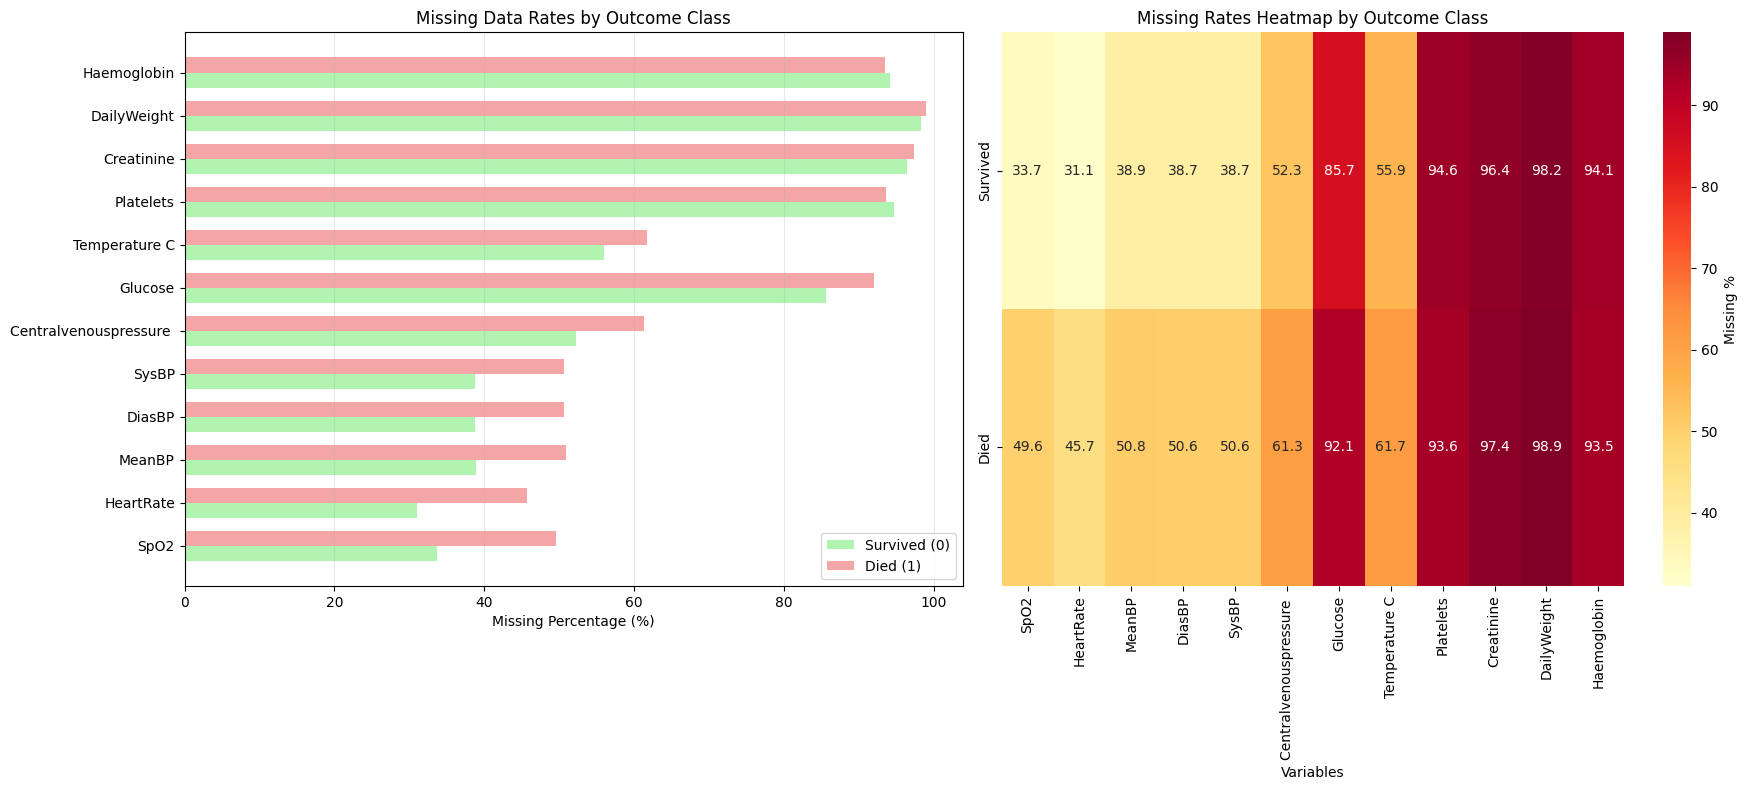

In [ ]:
# prepare data for visualization
vars_for_plot = outcome_comparison.index.tolist()
survived_pcts = outcome_comparison['survived_pct'].values
died_pcts = outcome_comparison['died_pct'].values
differences = outcome_comparison['difference'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# side by side bar chart
x = np.arange(len(vars_for_plot))
width = 0.35
ax1.barh(x - width/2, survived_pcts, width, label='Survived (0)', color='lightgreen', alpha=0.7)
ax1.barh(x + width/2, died_pcts, width, label='Died (1)', color='lightcoral', alpha=0.7)
ax1.set_yticks(x)
ax1.set_yticklabels(vars_for_plot)
ax1.set_xlabel('Missing Percentage (%)')
ax1.set_title('Missing Data Rates by Outcome Class')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# heatmap of missing rates by outcome
heatmap_data = outcome_comparison[['survived_pct', 'died_pct']].T
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Missing %'}, ax=ax2, yticklabels=['Survived', 'Died']) # y- axis labels
ax2.set_title('Missing Rates Heatmap by Outcome Class')
ax2.set_xlabel('Variables')

plt.tight_layout()
plt.show()

There are statistically significant differences in missingness between the two outcome classes. 8 variables show significant differences (p < 0.05) in the amount of missing data. This suggests that missing data patterns may be informative about patient outcomes. The possible explanations for these differences could be more intensive monitoring for critical patients (who ended up dying). Moreover, different care protocols for different patient conditions (again, some conditions with higher monitoring could have ended in death). 

Exercise 3:

Mean Arterial Pressure.

In [ ]:
# create a class for MAP variable generation

class MAPCalc:
    def __init__(self, sys_col='SysBP', dias_col='DiasBP', out_col='MAP'):
        self.sys_col = sys_col
        self.dias_col = dias_col
        self.out_col = out_col

    # calculate MAP using sys and dias
    def compute(self, df):
        sysbp = pd.to_numeric(df[self.sys_col], errors='coerce')
        diasbp = pd.to_numeric(df[self.dias_col], errors='coerce')
        return (sysbp + 2 * diasbp) / 3

    # generate a column for the variable
    def add_to_df(self, df):
        df[self.out_col] = self.compute(df)
        return df

# execute class
map_calc = MAPCalc(sys_col='SysBP', dias_col='DiasBP', out_col='MAP')
df = map_calc.add_to_df(df)

df[['PatientID', 'Mortality', 'SysBP', 'DiasBP', 'MAP']].head()


,PatientID,Mortality,SysBP,DiasBP,MAP
0,181199,0,NaN,NaN,NaN
1,181199,0,90.0,73.0,78.666667
2,181199,0,130.0,57.0,81.333333
3,181199,0,107.0,62.0,77.000000
4,181199,0,132.0,82.0,98.666667


In [ ]:
# filtering for patients without missing MAP 
# important for subsequent random selection of participants for scatter plot
# fraction of missing MAP per patient
map_missing_frac = (
    df.groupby('PatientID')['MAP']
      .apply(lambda x: x.isna().mean())
)

# patients with less than 20% of MAP missing
good_patients = map_missing_frac[map_missing_frac < 0.2].index

print('patients before filtering:', df['PatientID'].nunique())
print('patients after filtering:', len(good_patients))

# keep only those patients
df_good = df[df['PatientID'].isin(good_patients)].copy()

patients before filtering: 1126
patients after filtering: 406


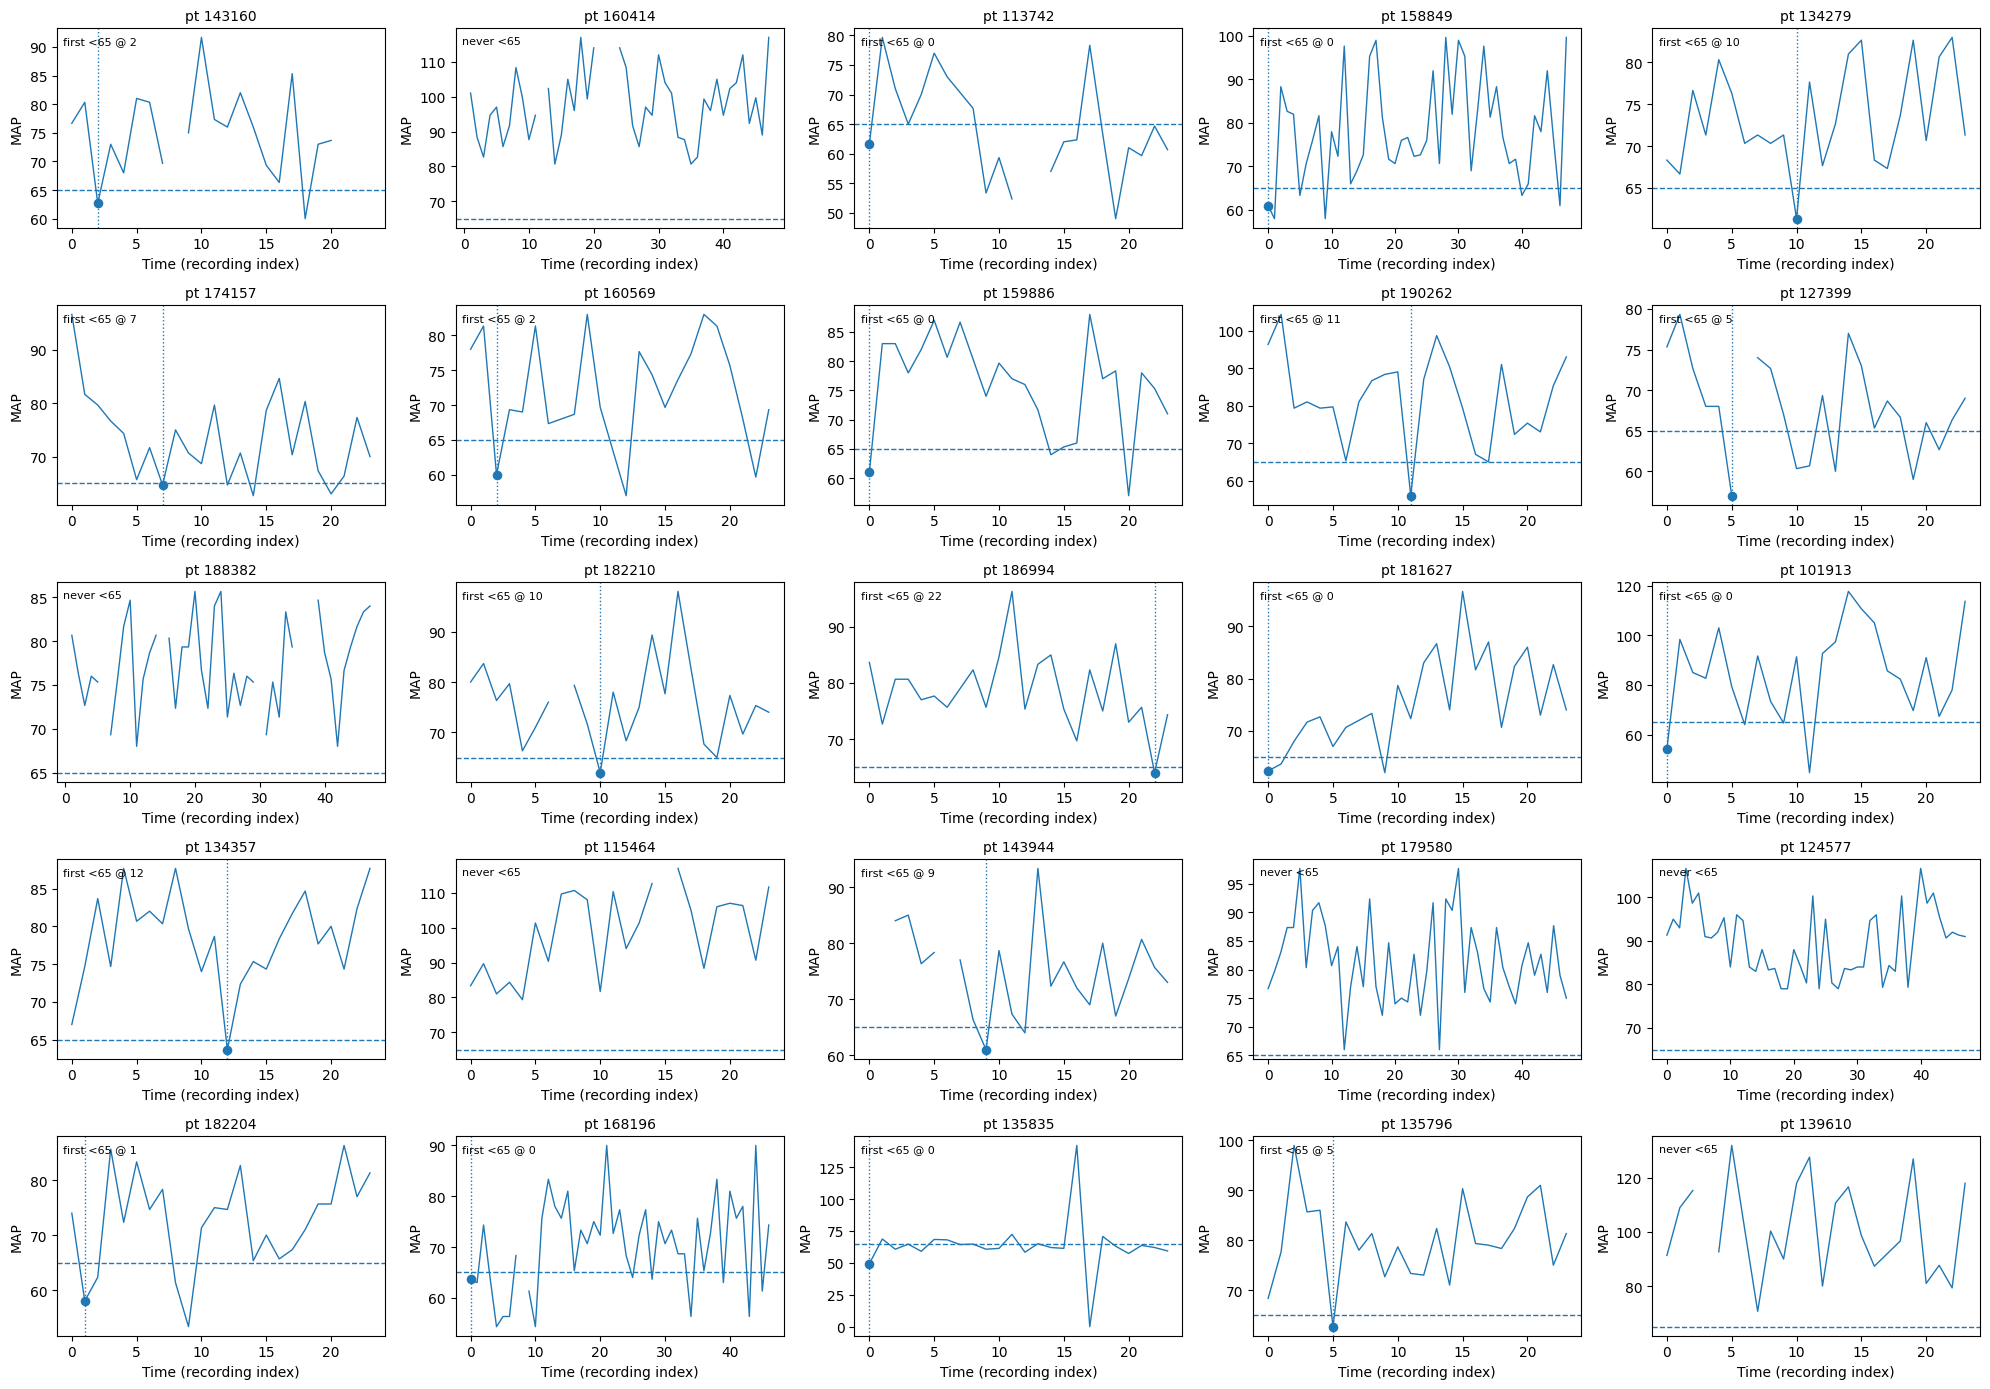

In [ ]:
# -# randomly select 25 patients from the df with 20% or less MAP missing
np.random.seed(0)
patients = df_good['PatientID'].dropna().unique()
picked = np.random.choice(patients, size=min(25, len(patients)), replace=False)

plot_df = df_good[df_good['PatientID'].isin(picked)].sort_values(['PatientID', 'Time'])

fig, axes = plt.subplots(5, 5, figsize=(20, 14))
axes = axes.flatten()

# loop over for 25 random patients
for i, pid in enumerate(picked):
    ax = axes[i]
    d = plot_df[plot_df['PatientID'] == pid].copy()

    ax.plot(d['Time'], d['MAP'], linewidth=1)
    ax.axhline(65, linestyle='--', linewidth=1)

    # infer vaso start = first time MAP less than 65 for the patioents - ChatGPT consulted for debugging and text positioning
    hit = d[d['MAP'] < 65]
    if not hit.empty:
        t0 = hit['Time'].iloc[0]
        m0 = hit['MAP'].iloc[0]
        ax.scatter([t0], [m0], s=35)
        ax.axvline(t0, linestyle=':', linewidth=1)
        ax.text(0.02, 0.92, f'first <65 @ {int(t0)}', transform=ax.transAxes, fontsize=8)
    else:
        ax.text(0.02, 0.92, 'never <65', transform=ax.transAxes, fontsize=8)

    ax.set_title(f'pt {pid}', fontsize=10)
    ax.set_xlabel('Time (recording index)')
    ax.set_ylabel('MAP')

for j in range(len(picked), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Exercise 4:

Aggregate columns.


In [ ]:
# make sure column names are clean
df = df.copy()
df.columns = df.columns.str.strip()

# aggregation rules (same as before)
agg_dict = {'Centralvenouspressure': ['min', 'mean'],
    'DailyWeight': 'min',
    'Glucose': 'min',
    'Creatinine': 'max',
    'Haemoglobin': 'max',
    'HeartRate': 'max',
    'SpO2': 'max',
    'Platelets': 'max',
    'Temperature C': 'max',
    'DiasBP': 'mean',
    'SysBP': 'mean',
    'MeanBP': 'mean',}

patient_matrix = (df.groupby('PatientID').agg(agg_dict))

# flatten column names
patient_matrix.columns = [f'{col}_{func}' for col, func in patient_matrix.columns]

patient_matrix = patient_matrix.reset_index()

# add Mortality (
mortality_df = (df[['PatientID', 'Mortality']].drop_duplicates(subset='PatientID'))

patient_matrix = patient_matrix.merge(mortality_df, on='PatientID', how='left')

print(patient_matrix.shape)
patient_matrix.head()

(1126, 15)


,PatientID,Centralvenouspressure_min,Centralvenouspressure_mean,DailyWeight_min,Glucose_min,Creatinine_max,Haemoglobin_max,HeartRate_max,SpO2_max,Platelets_max,Temperature C_max,DiasBP_mean,SysBP_mean,MeanBP_mean,Mortality
0,100059,8.0,12.625000,91.400002,45.0,0.7,11.7,100.0,100.0,162.0,37.700001,53.250000,125.958333,74.416667,0
1,100298,5.0,9.545455,84.300003,79.0,0.6,10.7,93.0,100.0,372.0,38.500000,55.708333,99.375000,72.130435,0
2,100321,9.0,13.000000,69.599998,NaN,NaN,7.1,94.0,100.0,86.0,37.099998,51.842105,117.368421,72.421053,0
3,100336,9.0,15.250000,NaN,134.0,2.8,11.4,116.0,96.0,133.0,37.099998,61.444444,93.333333,74.333333,0
4,100392,8.0,9.600000,NaN,114.0,0.9,9.3,110.0,96.0,116.0,37.799999,57.875000,100.875000,70.500000,0


boxplots for: 13 vars


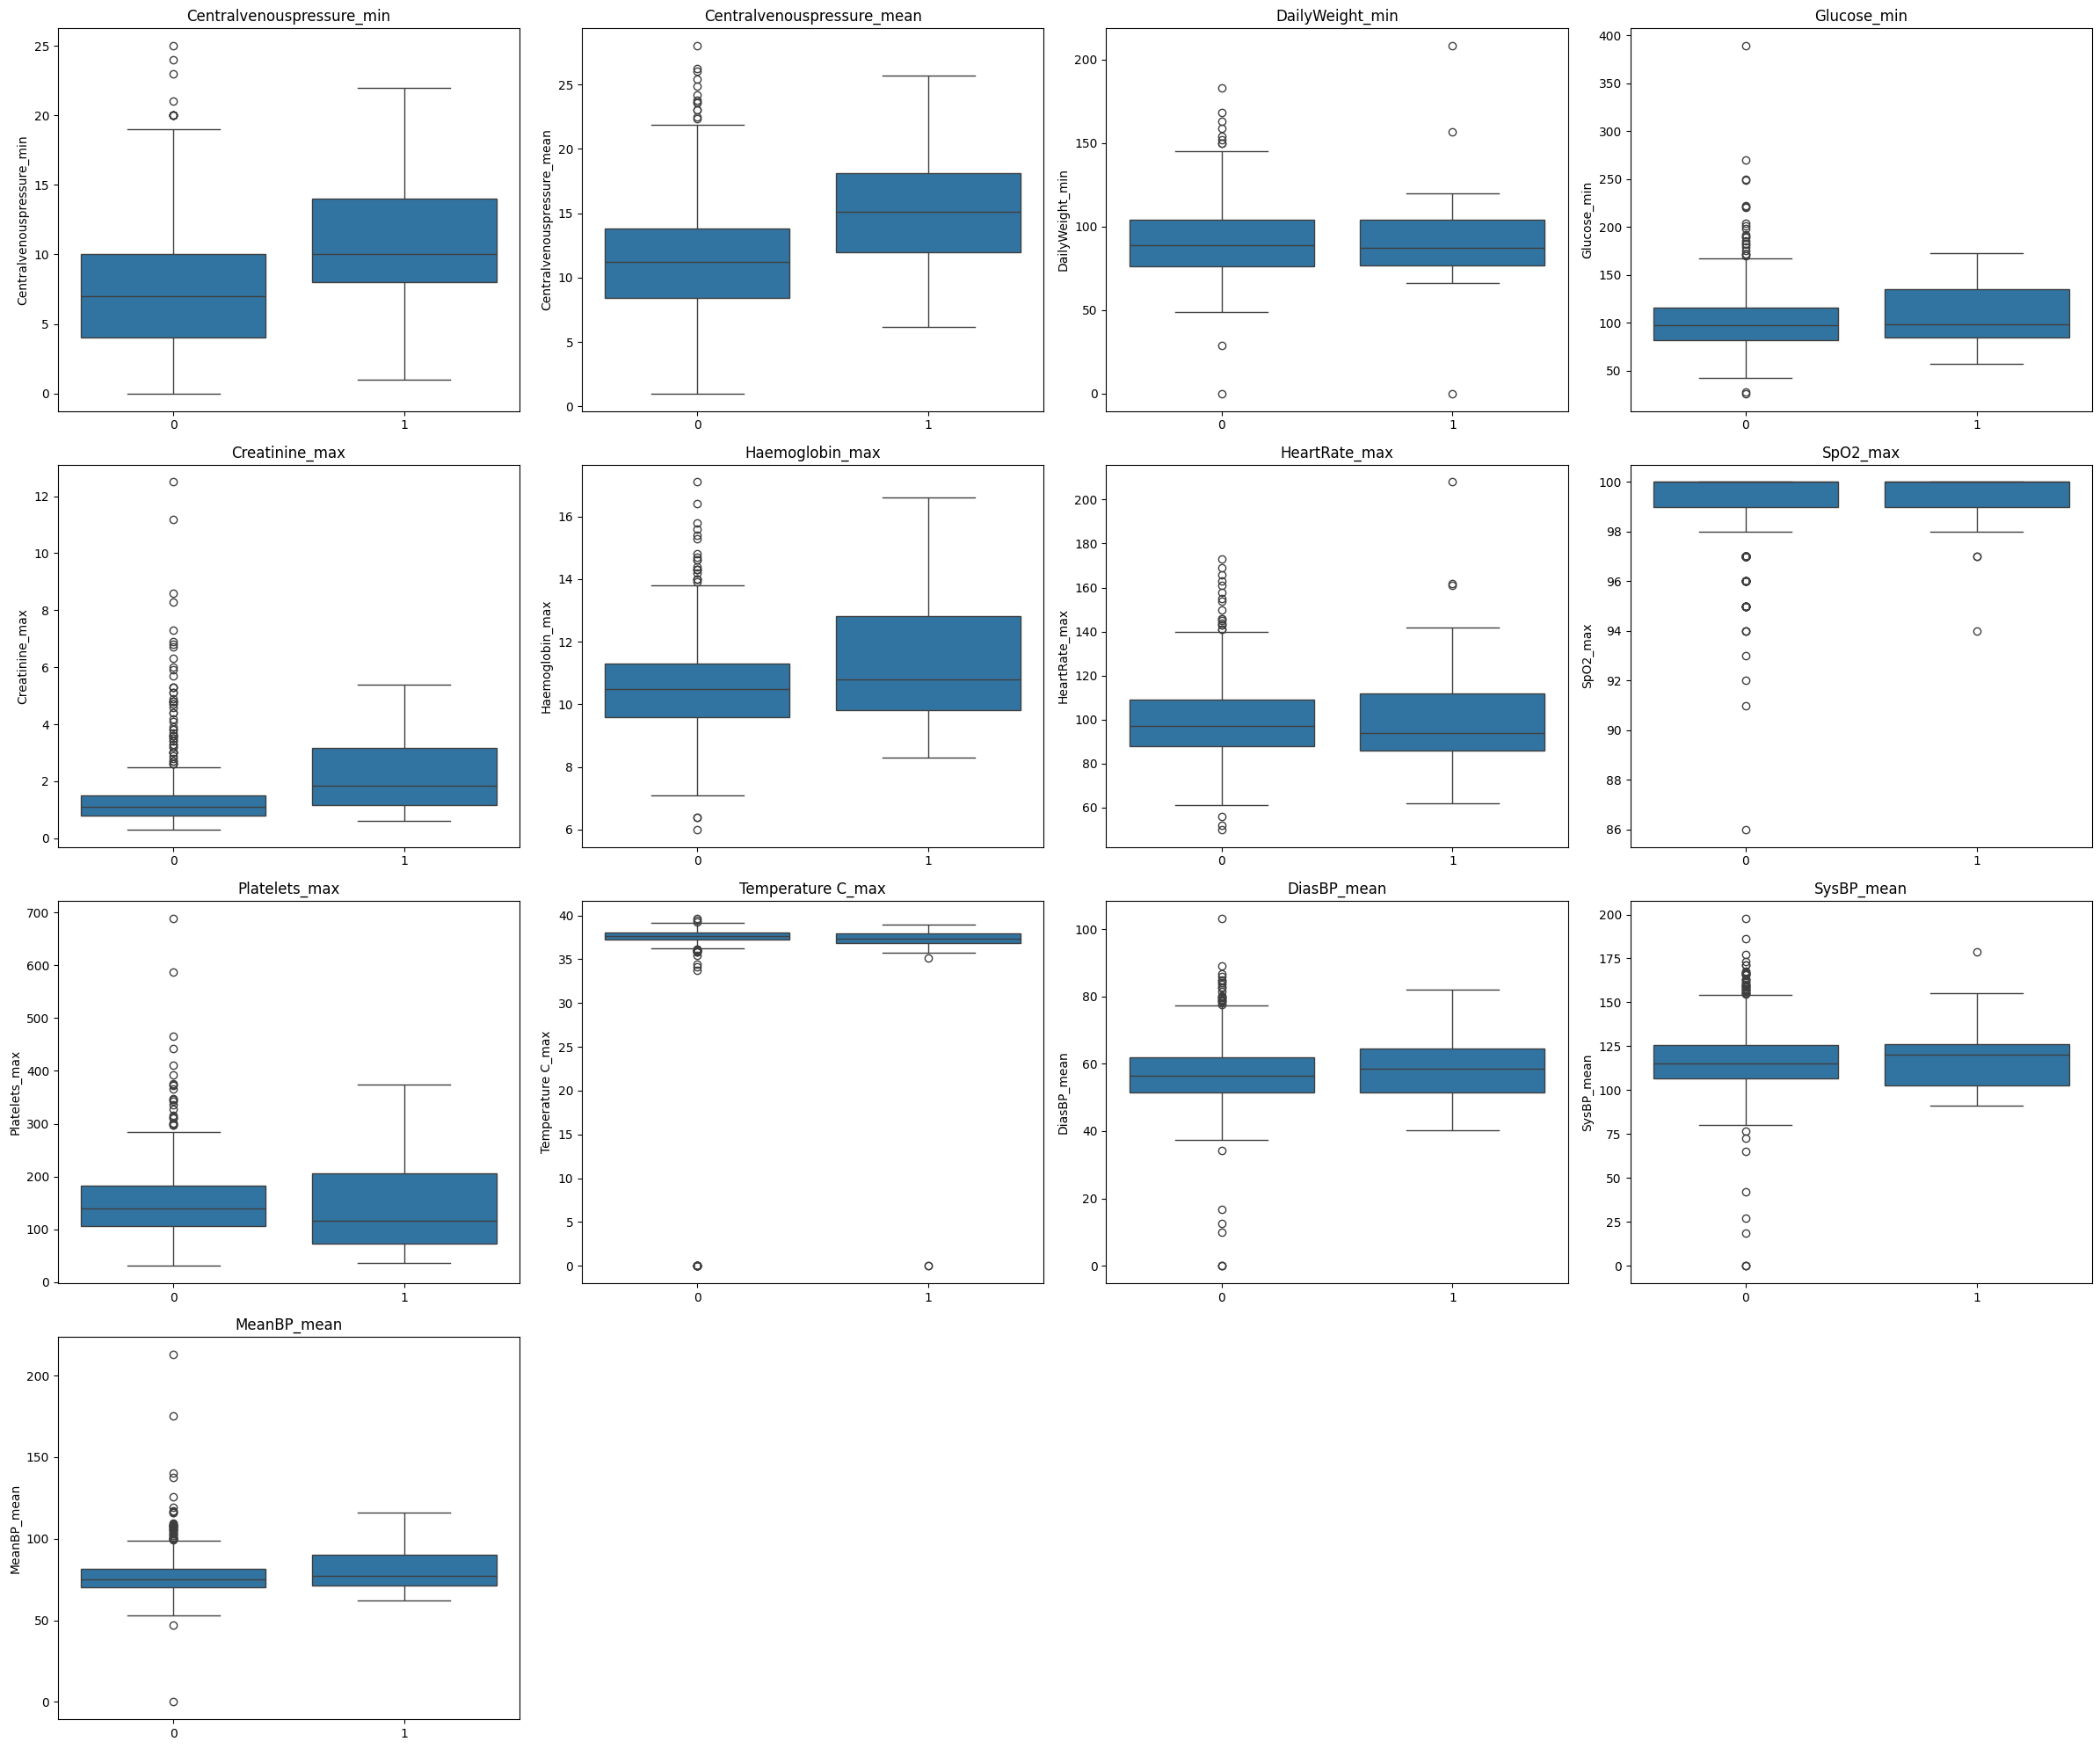

In [ ]:

# pick the aggregated numeric columns 
vars_ = patient_matrix.select_dtypes(include=['float64', 'int64']).columns.tolist()
vars_ = [v for v in vars_ if v not in ['PatientID', 'Mortality']]

print('boxplots for:', len(vars_), 'vars')

ncols = 4
nrows = (len(vars_) + ncols - 1) // ncols
fig, ax = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
ax = ax.flatten()

# create a boxplot for each of the aggregated variables
for i, col in enumerate(vars_):
    sns.boxplot(data=patient_matrix, x='Mortality', y=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(col)

for j in range(len(vars_), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()








The differences between the outcome classes seem to be more obvious across more variables than it is in Figure 3. Variables such as minimal and mean central venous pressure or maximal creatine have moderately different distributions between the two classes. Nevertheless, other variables seem to be comparable across both classes which aligns with findings from question 1